# Imports

In [1]:
import mne
from matplotlib import pyplot as plt

import sys
sys.path.insert(0,'.')
import ccs_eeg_utils


# Load & plot data

In [2]:
from mne_bids import (BIDSPath,read_raw_bids)

In [3]:
# print current working directory
import os
print(os.getcwd())

/Users/yannikfruehwirth/Desktop/academia/semester4/EEG/exercises/ex1


In [4]:
# path where to save the datasets.
bids_root = "bids"
subject_id = '030' # recommend subject 30 for now

bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)


# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)

Reading /Users/yannikfruehwirth/Desktop/academia/semester4/EEG/exercises/ex1/bids/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_eeg.fdt
Reading events from bids/sub-030/ses-P3/eeg/sub-030_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values.Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: respon

/var/folders/h4/ky6q0jhn3tl_qz84xn440gcr0000gn/T/ipykernel_1943/4245659147.py:11: RuntimeWarning: Data file name in EEG.data (sub-030_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-030_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)
/var/folders/h4/ky6q0jhn3tl_qz84xn440gcr0000gn/T/ipykernel_1943/4245659147.py:11: RuntimeWarning: "ARS" is not a BIDS-acceptable coordinate frame for EEG. The supported coordinate frames are: ['ICBM452AirSpace', 'ICBM452Warp5Space', 'IXI549Space', 'fsaverage', 'fsaverageSym', 'fsLR', 'MNIColin27', 'MNI152Lin', 'MNI152NLin2009aSym', 'MNI152NLin2009bSym', 'MNI152NLin2009cSym', 'MNI152NLin2009aAsym', 'MNI152NLin2009bAsym', 'MNI152NLin2009cAsym', 'MNI152NLin6Sym', 'MNI152NLin6ASym', 'MNI305', 'NIHPD', 'OASIS30AntsOASISAnts', 'OASIS30Atropos', 'Talairach', 'UNCInfant', 'fsaverage3', 'fsaverage4', 'fsaverage5', 'fsaverage6', 'fsaveragesym', 'UNCInfant0V21', 'UNCInfant1V21', 'UNCInfant2V21', 'UNCI

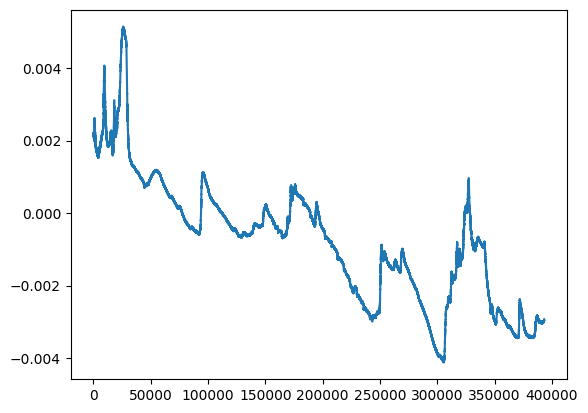

In [5]:
plt.plot(raw[10,:][0].T)

In [6]:
# print min, max of y and x
print("Min y:", raw[10,:][0].min())
print("Max y:", raw[10,:][0].max())
print("Min x:", raw[10,:][1].min())
print("Max x:", raw[10,:][1].max()) 

Min y: -0.0041224453125
Max y: 0.00515006884765625
Min x: 0.0
Max x: 383.9990234375


Q1:<br>
What is the range of the data (in sense of min-y to max-y in µ-volt)?<br><br>
A1:<br> 
The range of the data is from 0.0041224453125 to 0.00515006884765625 µ-volt.

In [7]:
print(raw.info)

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, F3, F7, FC3, C3, C5, P3, P7, P9, PO7, PO3, O1, Oz, Pz, CPz, ...
 chs: 30 EEG, 3 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 1024.0 Hz
 subject_info: <subject_info | his_id: sub-030, sex: 2>
>


Q2:<br>
What is the sampling frequency?<br><br>
A2:<br> 
1024.0 Hz (1024 samples per second)

# Epoching

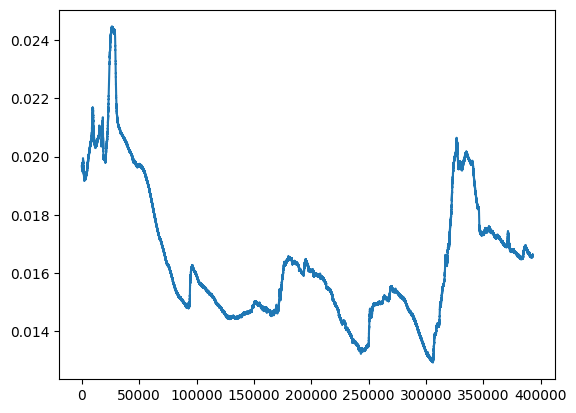

In [8]:
# Step 1: remove all channels except Cz
raw_subselect = raw.copy().pick(["Cz"])

# plot the selected channel
plt.plot(raw_subselect[0,:][0].T)

In [9]:
# Step 2: investigate annotations
print(raw.annotations)

<Annotations | 402 segments: response:201 (193), response:202 (9), ...>


In [10]:
# Step 3: convert annotations to events
evts,evts_dict = mne.events_from_annotations(raw_subselect)

Used Annotations descriptions: [np.str_('response:201'), np.str_('response:202'), np.str_('stimulus:11'), np.str_('stimulus:12'), np.str_('stimulus:13'), np.str_('stimulus:14'), np.str_('stimulus:15'), np.str_('stimulus:21'), np.str_('stimulus:22'), np.str_('stimulus:23'), np.str_('stimulus:24'), np.str_('stimulus:25'), np.str_('stimulus:31'), np.str_('stimulus:32'), np.str_('stimulus:33'), np.str_('stimulus:34'), np.str_('stimulus:35'), np.str_('stimulus:41'), np.str_('stimulus:42'), np.str_('stimulus:43'), np.str_('stimulus:44'), np.str_('stimulus:45'), np.str_('stimulus:51'), np.str_('stimulus:52'), np.str_('stimulus:53'), np.str_('stimulus:54'), np.str_('stimulus:55')]


In [11]:
# step 4: subset events to only those containing "stimulus"
wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)

In [12]:
# step 5: epoching
epochs = mne.Epochs(raw_subselect,evts,evts_dict_stim,tmin=-0.1,tmax=1) # -0.1 to 1 sec

# print info about epochs
print("\n")
print(epochs)

# print amount of epochs per condition
print("\n")
print(epochs.event_id)

Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


<Epochs | 200 events (good & bad), -0.1 – 1 s (baseline -0.1 – 0 s), ~6 KiB, data not loaded,
 np.str_('stimulus:11'): 8
 np.str_('stimulus:12'): 4
 np.str_('stimulus:13'): 10
 np.str_('stimulus:14'): 9
 np.str_('stimulus:15'): 9
 np.str_('stimulus:21'): 6
 np.str_('stimulus:22'): 8
 np.str_('stimulus:23'): 12
 np.str_('stimulus:24'): 3
 np.str_('stimulus:25'): 11
 and 15 more events ...>


{np.str_('stimulus:11'): 3, np.str_('stimulus:12'): 4, np.str_('stimulus:13'): 5, np.str_('stimulus:14'): 6, np.str_('stimulus:15'): 7, np.str_('stimulus:21'): 8, np.str_('stimulus:22'): 9, np.str_('stimulus:23'): 10, np.str_('stimulus:24'): 11, np.str_('stimulus:25'): 12, np.str_('stimulus:31'): 13, np.str_('stimulus:32'): 14, np.str_('stimulus:33'): 15, np.str_('stimulus:34'): 16, np.str_('stimulus:35'): 17, np.str_('stimulus:41'

## Plotting

### Overlaid trials

Loading data for 200 events and 1127 original time points ...
0 bad epochs dropped


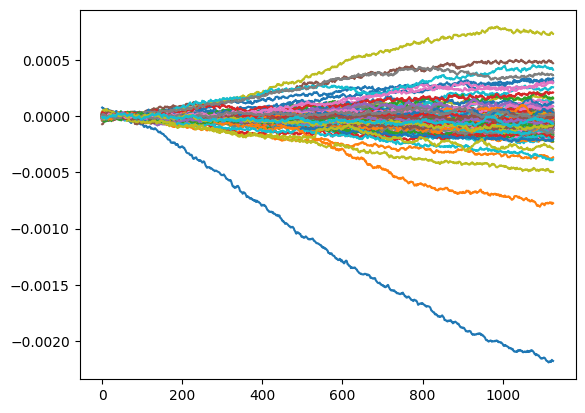

In [ ]:
# Step 6: plot all trials for Cz overlaid
plt.plot(epochs.get_data()[:, 0, :].T) # 1 line per trial

In [17]:
# print statistics: min and max of y
print("Min y:", epochs.get_data()[:, 0, :].min())
print("Max y:", epochs.get_data()[:, 0, :].max())

Loading data for 200 events and 1127 original time points ...
Min y: -0.00219213899423543
Loading data for 200 events and 1127 original time points ...
Max y: 0.0007987635865442915


Q3:<br>
What is the scale-range of the epoched data now?<br><br>
A3:<br> 
The range of the data is from -0.00219213899423543 to 0.0007987635865442915 µ-volt.

### Average over trials

Loading data for 200 events and 1127 original time points ...


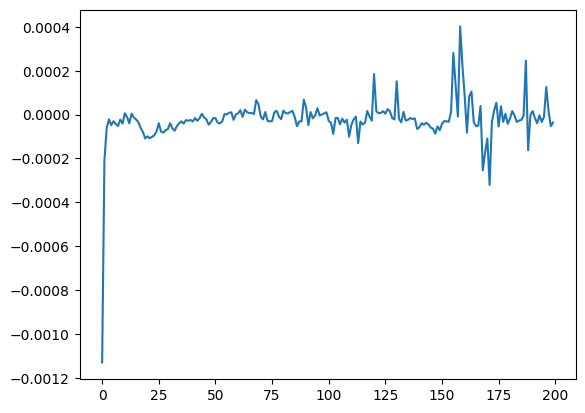

In [15]:
# average over trials
plt.plot(epochs.get_data()[:, 0, :].T.mean(axis=0))


# My first ERP

In [21]:
target = ["stimulus:{}{}".format(k,k) for k in [1,2,3,4,5]]
distractor = ["stimulus:{}{}".format(k,j) for k in [1,2,3,4,5] for j in [1,2,3,4,5] if k!=j]

evoked_target = epochs[target].average()
evoked_distractor = epochs[distractor].average()

Target evoked:
Need more than one channel to make topography for eeg. Disabling interactivity.


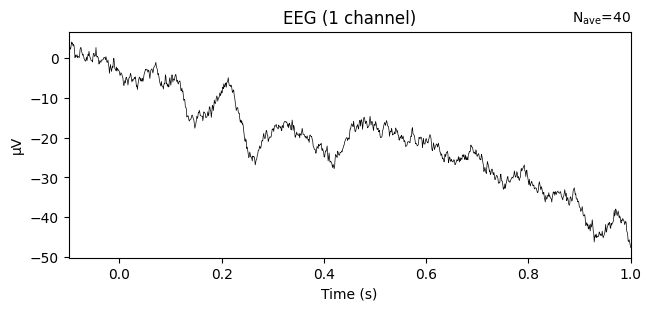

------------------------------
Distractor evoked:
Need more than one channel to make topography for eeg. Disabling interactivity.


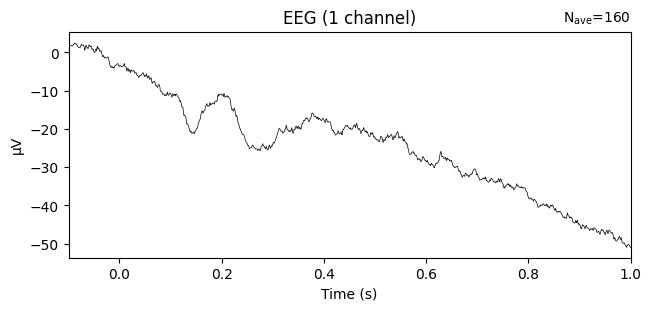

------------------------------
Comparison:


/var/folders/h4/ky6q0jhn3tl_qz84xn440gcr0000gn/T/ipykernel_1943/3741665131.py:8: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds([evoked_target, evoked_distractor])


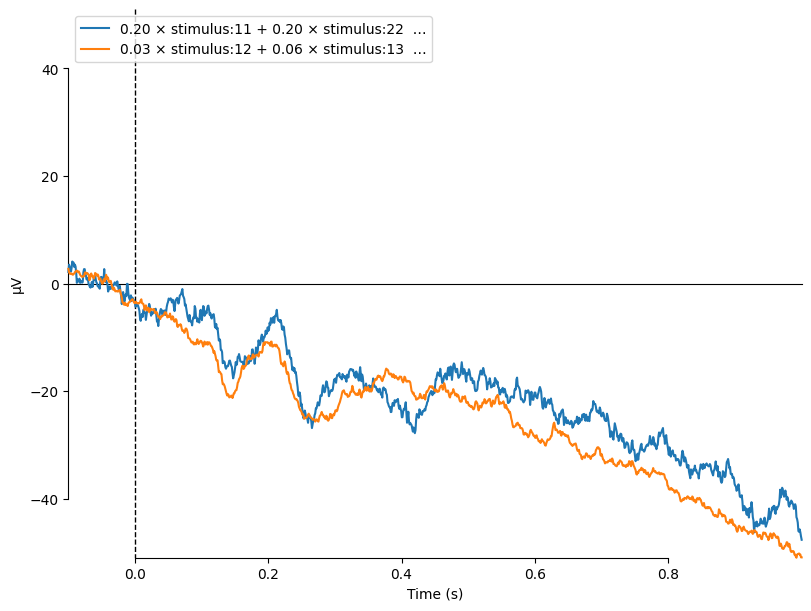

[<Figure size 800x600 with 1 Axes>]

In [23]:

print("Target evoked:")
evoked_target.plot()
print("-"*30)
print("Distractor evoked:")
evoked_distractor.plot()
print("-"*30)
print("Comparison:")
mne.viz.plot_compare_evokeds([evoked_target, evoked_distractor])


In [ ]:
# print min max y-axis for both evokeds
print(f"Target evoked min y: {evoked_target.data.min():.10f}, max y: {evoked_target.data.max():.10f}")
print(f"Distractor evoked min y: {evoked_distractor.data.min():.10f}, max y: {evoked_distractor.data.max():.10f}")

Target evoked min y: -0.0000476515, max y: 0.0000040938
Distractor evoked min y: -0.0000509871, max y: 0.0000027255


Q4:<br>
What is the unit/scale of the data now? Set it into context to the other two scales you reported before<br><br>
A4: -0.0000476515 to 0.0000040938. Scale is much smaller in comparison<br> 
